## Library

In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

## Dataset

In [2]:
df_white = pd.read_csv("dataset/winequality-white.csv", delimiter=";")
df_red = pd.read_csv("dataset/winequality-red.csv", delimiter=";")

df = pd.concat([df_red, df_white], axis=0)

## EDA

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [5]:
##CEK NUll
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


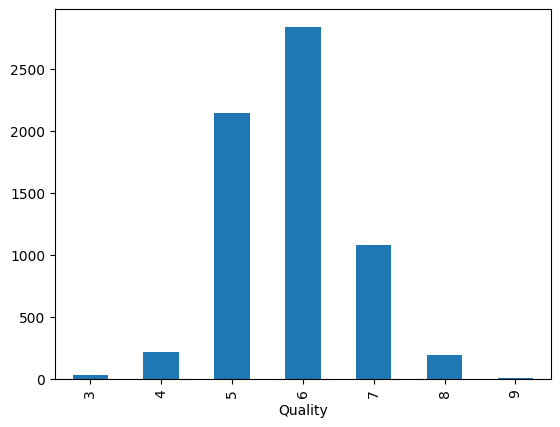

In [6]:
df["quality"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Quality")
plt.show()

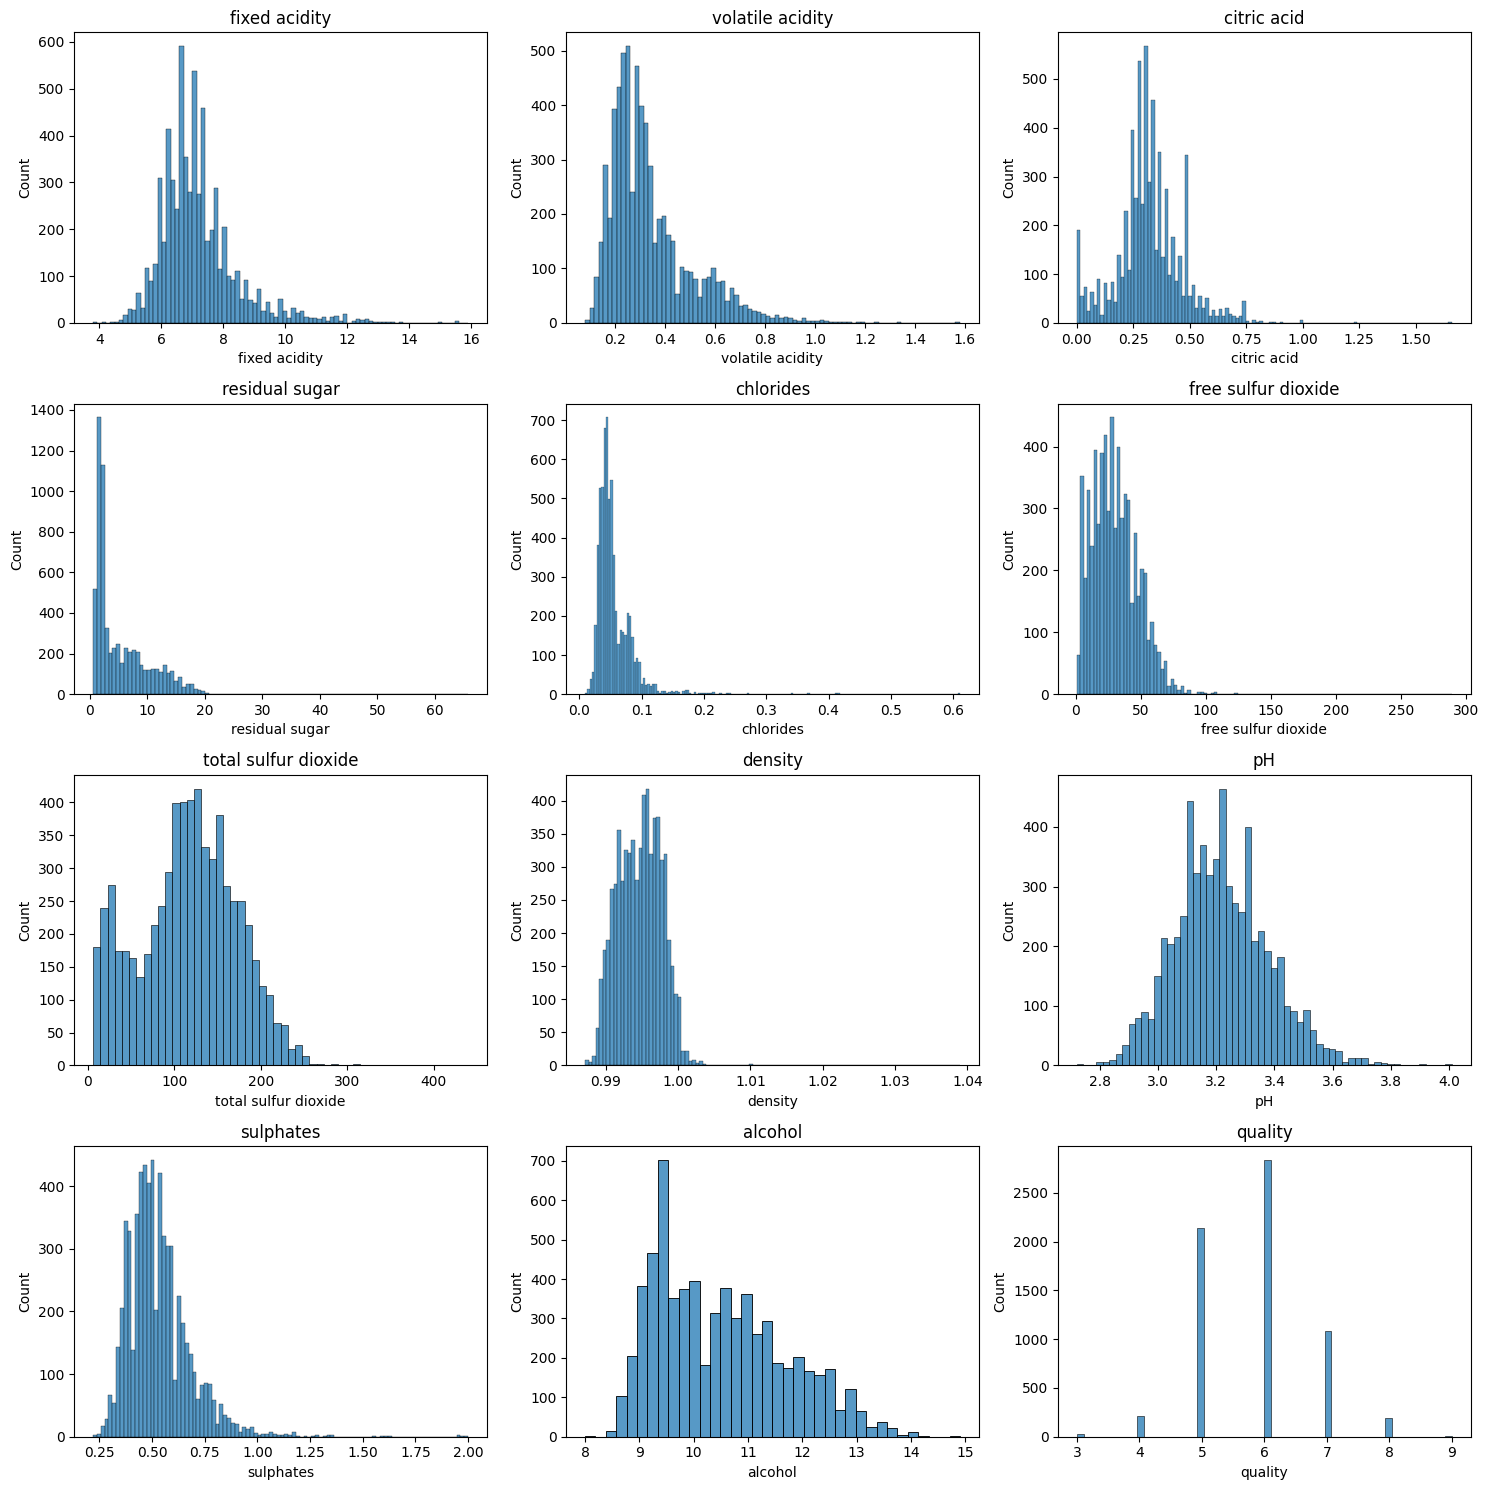

In [7]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64', 'object'])):
    sns.histplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

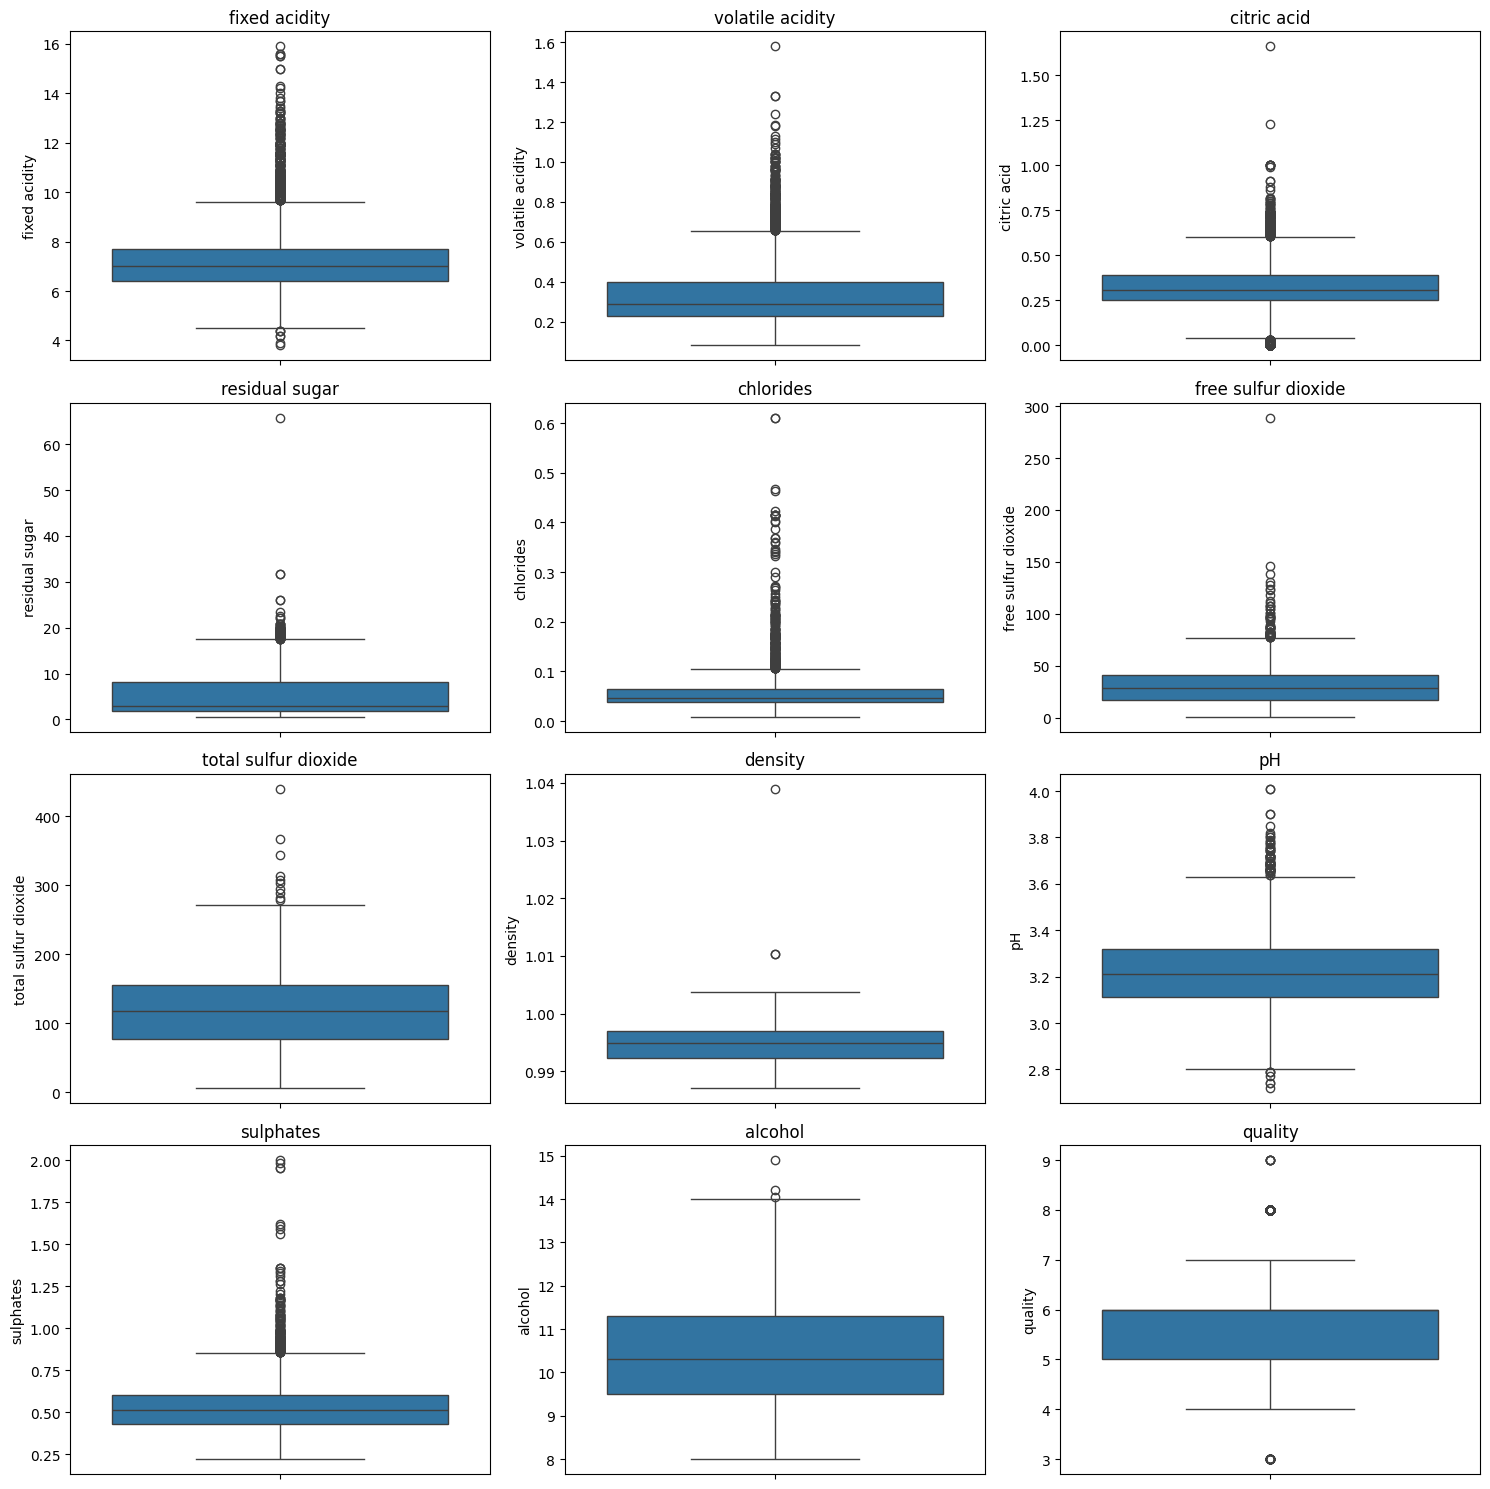

In [8]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(df.select_dtypes(include=['int64', 'float64', 'object'])):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].tick_params(axis='x')  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

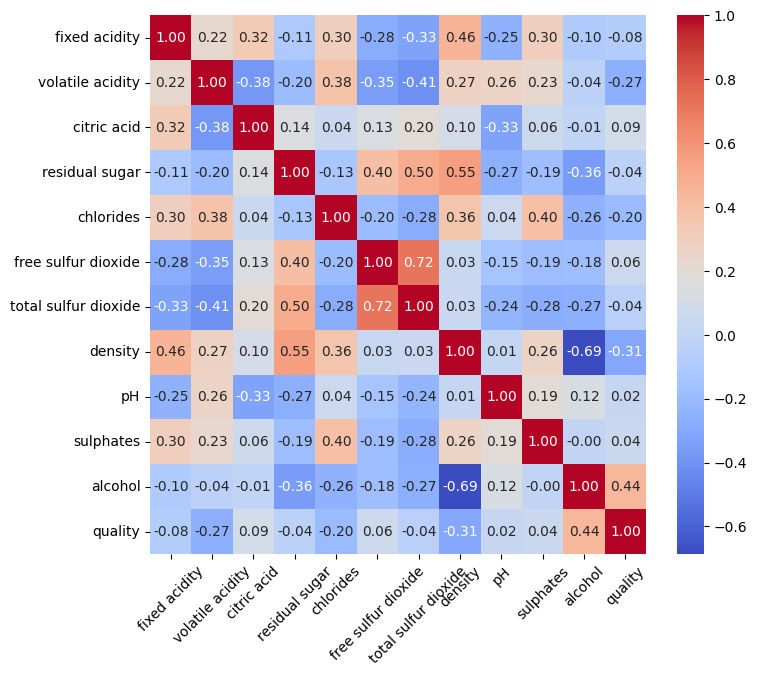

In [9]:
plt.figure(figsize=(8, 7))
korelasi = df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')
sns.heatmap(korelasi, annot=True, fmt='.2f', cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

## Preprocessing

In [10]:
x = df.drop('quality', axis=1)
y = df['quality']

In [11]:
smote = SMOTE(random_state=42, k_neighbors=3)
x_res, y_res = smote.fit_resample(x, y)
df_after_smote = pd.concat([x_res, y_res], axis=1)

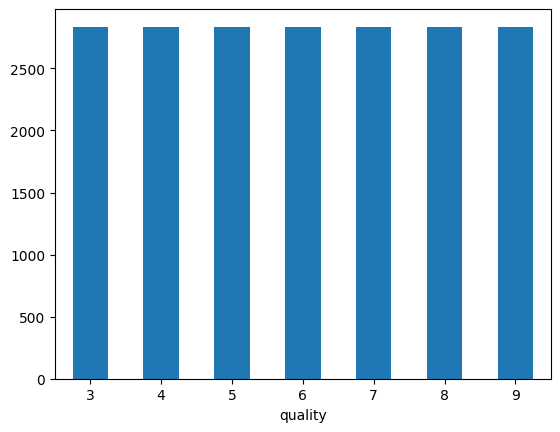

In [12]:
y_res.value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [13]:
x = df_after_smote.drop('quality', axis=1)
y = df_after_smote['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Training

In [14]:
# GaussianNB
pipe_g = Pipeline([
    ('scale', StandardScaler()),
    ('clf', GaussianNB())
])
pipe_g.fit(X_train, y_train)
g_pred = pipe_g.predict(X_test)

# Logistic Regression
pipe_l = Pipeline([
    ('scale', StandardScaler()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipe_l.fit(X_train, y_train)
l_pred = pipe_l.predict(X_test)

## Evaluation

In [15]:
print("Accuracy Decision GaussianNB:", accuracy_score(y_test, g_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, g_pred))
print("\nClassification Report:\n", classification_report(y_test, g_pred))

Accuracy Decision GaussianNB: 0.44850163686728783

Confusion Matrix:
 [[249  80 135  10  24  48  21]
 [ 34 262 111   8  63  88   1]
 [ 33 142 241  25  37  83   6]
 [ 24  97 106  53  73 197  18]
 [ 10  40  48  29  77 293  70]
 [ 10   5  36  29  42 369  76]
 [  0   0   0   3   9  26 530]]

Classification Report:
               precision    recall  f1-score   support

           3       0.69      0.44      0.54       567
           4       0.42      0.46      0.44       567
           5       0.36      0.43      0.39       567
           6       0.34      0.09      0.15       568
           7       0.24      0.14      0.17       567
           8       0.33      0.65      0.44       567
           9       0.73      0.93      0.82       568

    accuracy                           0.45      3971
   macro avg       0.44      0.45      0.42      3971
weighted avg       0.44      0.45      0.42      3971



In [16]:
print("Accuracy Decision Logistic Regression:", accuracy_score(y_test, l_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, l_pred))
print("\nClassification Report:\n", classification_report(y_test, l_pred))

Accuracy Decision Logistic Regression: 0.5119617224880383

Confusion Matrix:
 [[326  97  37  28  28  17  34]
 [113 286  83  54  16  15   0]
 [ 87 129 225  75  25  23   3]
 [ 48  70 106 131 100 106   7]
 [ 22  34  40  84 178 191  18]
 [ 25   5  30  37 133 319  18]
 [  0   0   0   0   0   0 568]]

Classification Report:
               precision    recall  f1-score   support

           3       0.52      0.57      0.55       567
           4       0.46      0.50      0.48       567
           5       0.43      0.40      0.41       567
           6       0.32      0.23      0.27       568
           7       0.37      0.31      0.34       567
           8       0.48      0.56      0.52       567
           9       0.88      1.00      0.93       568

    accuracy                           0.51      3971
   macro avg       0.49      0.51      0.50      3971
weighted avg       0.49      0.51      0.50      3971



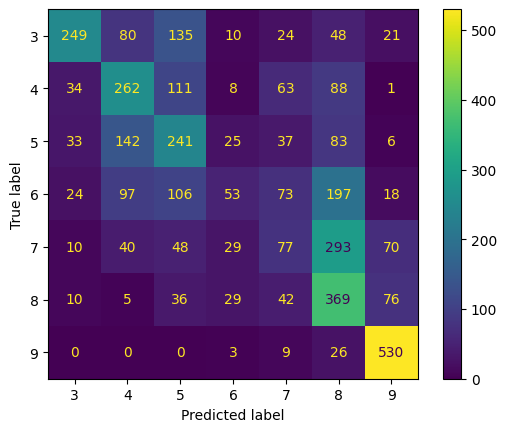

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, g_pred)
plt.show()

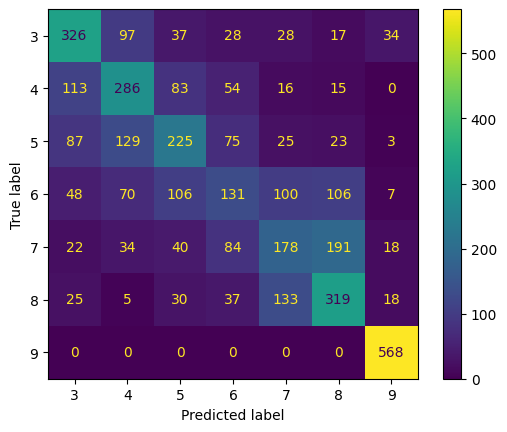

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, l_pred)
plt.show()